In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv("raw_ksi_data.csv")

In [3]:
df['SEVERE_COLLISION'] = (
    (df['INJURY'].isin(['Major', 'Fatal']))
).astype(int)

In [4]:
df['SEVERE_COLLISION'].value_counts()

SEVERE_COLLISION
0    11536
1     7421
Name: count, dtype: int64

In [5]:
speeding_df = df[df["SPEEDING"] == "Yes"]

In [6]:
df["SPEEDING"].value_counts()

SPEEDING
Yes    2694
Name: count, dtype: int64

In [7]:
speeding_df["SEVERE_COLLISION"].value_counts()

SEVERE_COLLISION
0    1674
1    1020
Name: count, dtype: int64

In [8]:
df["ALCOHOL"].value_counts()

ALCOHOL
Yes    808
Name: count, dtype: int64

In [9]:
alcohol_df = df[df["ALCOHOL"] == "Yes"]

In [10]:
alcohol_df["SEVERE_COLLISION"].value_counts()

SEVERE_COLLISION
0    496
1    312
Name: count, dtype: int64

In [11]:
df["DRIVCOND"].value_counts()

DRIVCOND
Normal                                6158
Inattentive                           1603
Unknown                               1129
Medical or Physical Disability         181
Had Been Drinking                      166
Ability Impaired, Alcohol Over .08     132
Ability Impaired, Alcohol              122
Other                                   97
Fatigue                                 58
Ability Impaired, Drugs                 20
Name: count, dtype: int64

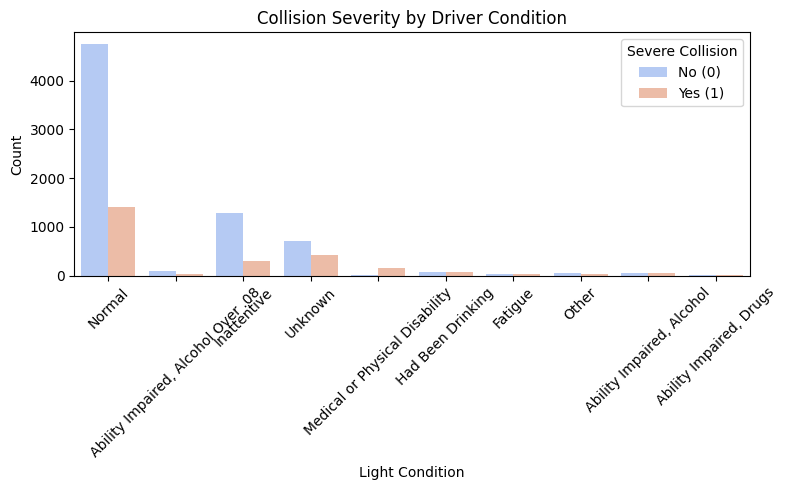

In [12]:

plt.figure(figsize=(8,5))
sns.countplot(x='DRIVCOND', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Driver Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


In [13]:
def simplify_driver_condition(cond):
    if cond == 'Normal':
        return 'Normal'
    elif cond == 'Inattentive':
        return 'Inattentive'
    elif cond == 'Fatigue':
        return 'Fatigue'
    elif cond in ['Had Been Drinking', 'Ability Impaired, Alcohol Over .08', 'Ability Impaired, Alcohol']:
        return 'Alcohol Impaired'
    elif cond == 'Ability Impaired, Drugs':
        return 'Drug Impaired'
    elif cond == 'Medical or Physical Disability':
        return 'Medical Condition'
    elif cond == 'Other':
        return 'Other'
    else:
        return 'Unknown'
df['DRIVCOND'] = df['DRIVCOND'].fillna('Normal')
df['DRIVCOND_GROUPED'] = df['DRIVCOND'].apply(simplify_driver_condition)

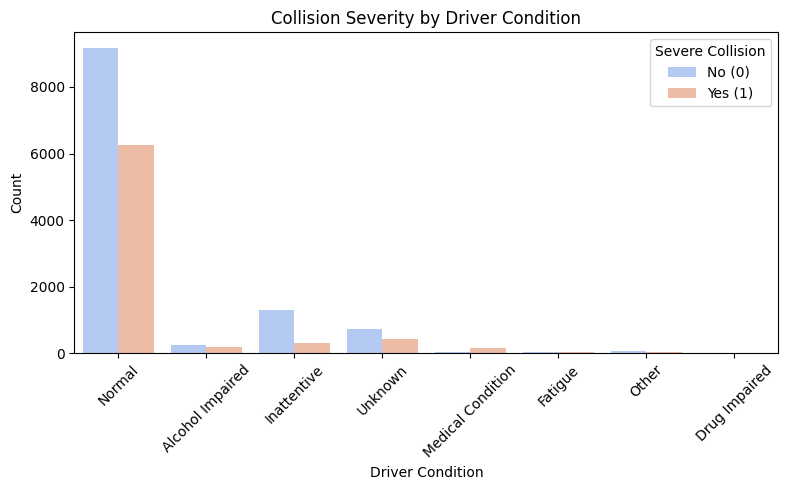

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='DRIVCOND_GROUPED', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Driver Condition')
plt.xlabel('Driver Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


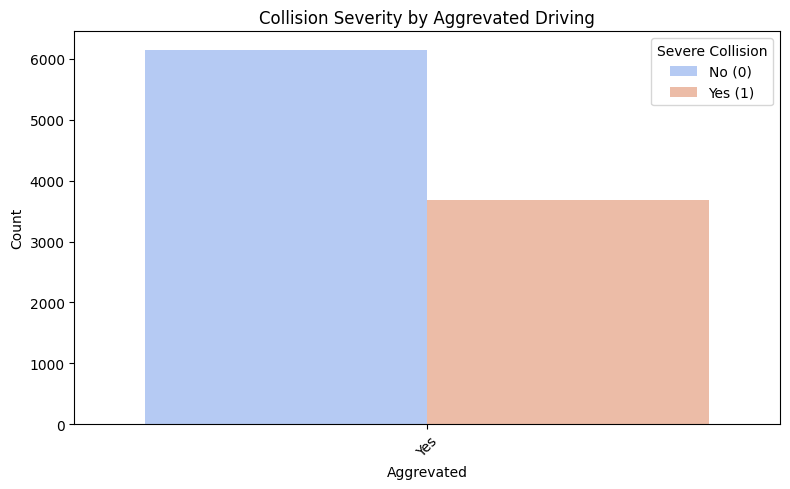

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='AG_DRIV', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Aggrevated Driving')
plt.xlabel('Aggrevated')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


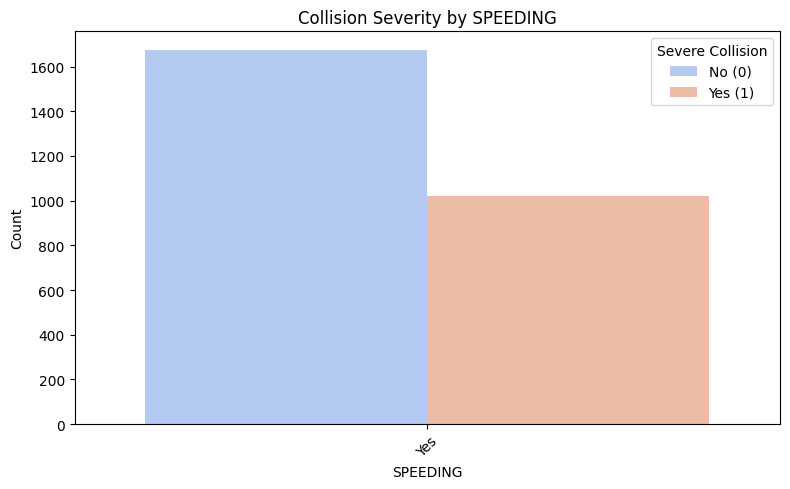

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='SPEEDING', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by SPEEDING')
plt.xlabel('SPEEDING')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()


In [17]:
df["VEHTYPE"].value_counts()

VEHTYPE
Automobile, Station Wagon        7805
Other                            4753
Bicycle                           819
Motorcycle                        747
Municipal Transit Bus (TTC)       284
Pick Up Truck                     270
Truck - Open                      182
Passenger Van                     143
Delivery Van                       87
Truck - Closed (Blazer, etc)       71
Street Car                         52
Truck - Dump                       52
Truck-Tractor                      42
Taxi                               28
Moped                              24
Bus (Other) (Go Bus, Gray Coa      20
Truck (other)                      20
Intercity Bus                      14
Truck - Tank                       11
Tow Truck                           9
Police Vehicle                      7
School Bus                          6
Unknown                             6
Construction Equipment              4
Rickshaw                            4
Fire Vehicle                        3
Truc

In [18]:
def categorize_vehicle(v):
    if v in ["Automobile, Station Wagon", "Passenger Van", "Taxi", "Other"]:
        return "Car"
    elif v in [
        "Pick Up Truck", "Truck – Open", "Truck – Closed (Blazer, etc)",
        "Truck – Dump", "Truck–Tractor", "Delivery Van",
        "Tow Truck", "Truck (other)", "Truck – Car Carrier",
        "Construction Equipment"
    ]:
        return "Truck"
    elif v in [
        "Municipal Transit Bus (TTC)", "Bus (Other) (Go Bus, Gray Coa)",
        "Intercity Bus", "School Bus"
    ]:
        return "Bus"
    elif v in ["Motorcycle", "Bicycle", "Moped", "Rickshaw"]:
        return "Two Wheeler"
    elif v in ["Police Vehicle", "Fire Vehicle", "Ambulance", "Other Emergency Vehicle"]:
        return "Emergency"
    else:
        return "Car"

In [19]:
df["VEHTYPE_GROUPED"] = df["VEHTYPE"].apply(categorize_vehicle)

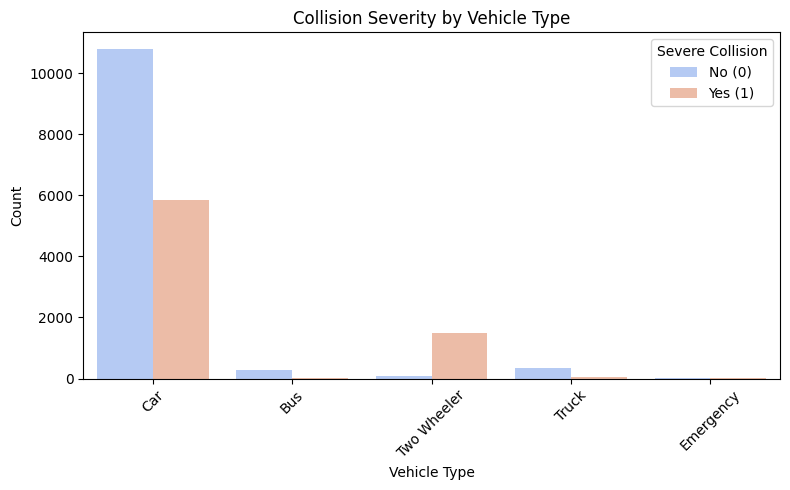

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='VEHTYPE_GROUPED', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [21]:
df["DRIVACT"].value_counts()

DRIVACT
Driving Properly                4425
Failed to Yield Right of Way    1603
Lost control                    1007
Improper Turn                    614
Other                            529
Disobeyed Traffic Control        497
Exceeding Speed Limit            264
Following too Close              254
Speed too Fast For Condition     216
Improper Lane Change             125
Improper Passing                 121
Wrong Way on One Way Road          9
Speed too Slow                     4
Name: count, dtype: int64

In [22]:
def categorize_drivact(a):
    if a == "Driving Properly":
        return "No Apparent Error"
    elif a in ["Failed to Yield Right of Way", "Disobeyed Traffic Control", "Wrong Way on One Way Road"]:
        return "Right-of-Way / Traffic Violation"
    elif a in ["Exceeding Speed Limit", "Speed too Fast For Condition", "Speed too Slow"]:
        return "Speed-Related"
    elif a in ["Lost control", "Improper Turn", "Following too Close", "Improper Lane Change", "Improper Passing"]:
        return "Control / Maneuver Error"
    else:
        return "Other / Unknown"


In [23]:
df["DRIVACT_GROUPED"] = df["DRIVACT"].apply(categorize_drivact)

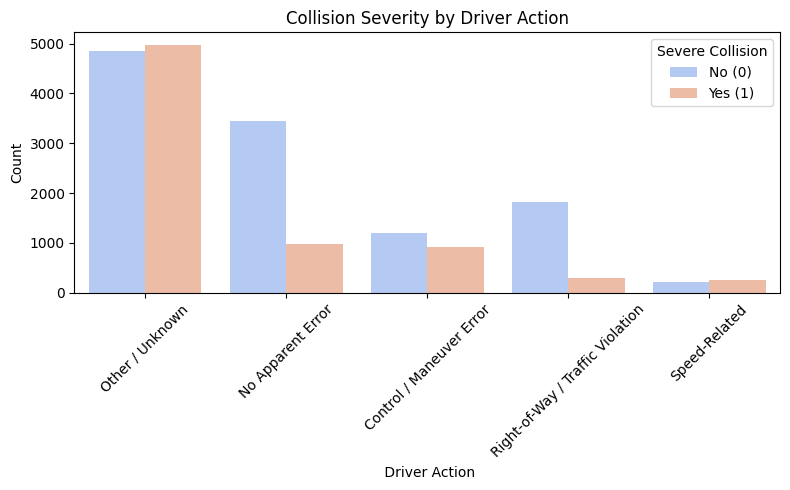

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='DRIVACT_GROUPED', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Driver Action')
plt.xlabel(' Driver Action')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [25]:
df["IMPACTYPE"].isna().sum()

np.int64(27)

In [26]:
df["IMPACTYPE"].value_counts()

IMPACTYPE
Pedestrian Collisions     7684
Turning Movement          2934
Cyclist Collisions        1861
Rear End                  1804
SMV Other                 1465
Angle                     1304
Approaching                959
Sideswipe                  522
Other                      204
SMV Unattended Vehicle     193
Name: count, dtype: int64

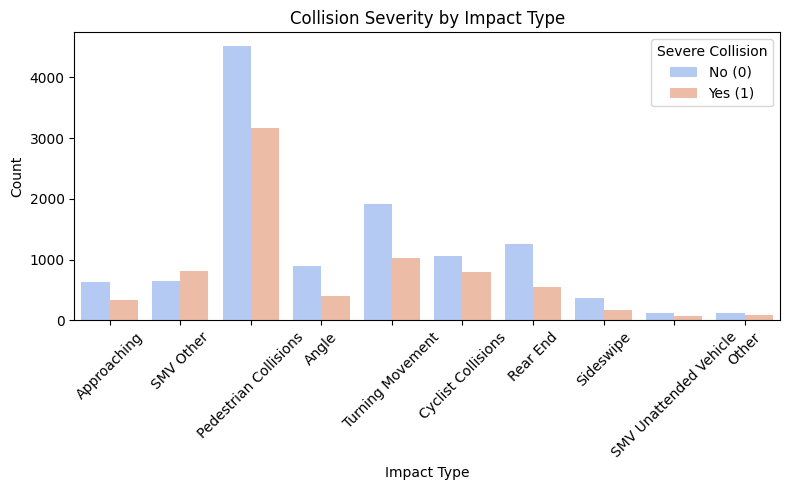

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='IMPACTYPE', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Impact Type')
plt.xlabel('Impact Type')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [28]:
def categorize_impact(impact):
    if impact in ["Pedestrian Collisions", "Cyclist Collisions"]:
        return "Pedestrian/Cyclist"
    elif impact == "Rear End":
        return "Rear End"
    elif impact in ["Sideswipe", "Approaching"]:
        return "Sideswipe/Approaching"
    elif impact in ["Angle", "Turning Movement"]:
        return "T-Bone"
    elif impact in ["SMV Other", "SMV Unattended Vehicle"]:
        return "SlowMoving/Parked"
    else:
        return "Other/Unknown"

In [29]:
df["IMPACT_TYPE"] = df["IMPACTYPE"].apply(categorize_impact)

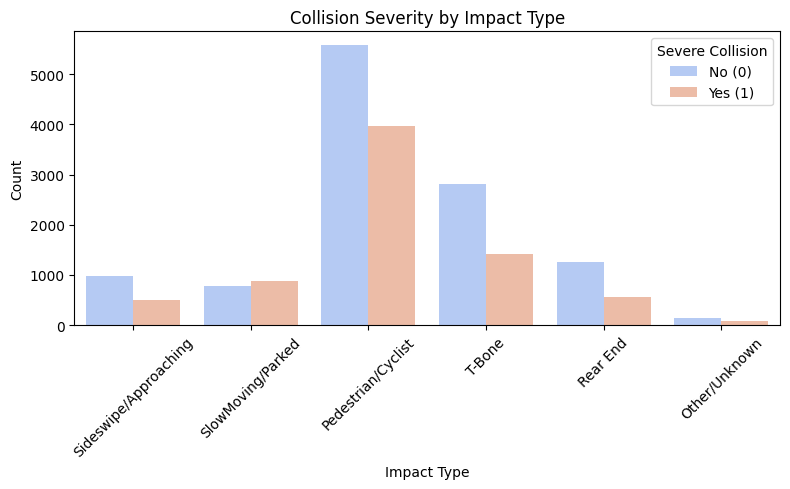

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='IMPACT_TYPE', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Impact Type')
plt.xlabel('Impact Type')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [31]:
df["INVAGE"].value_counts()

INVAGE
unknown     2625
20 to 24    1800
25 to 29    1723
30 to 34    1450
35 to 39    1382
50 to 54    1353
40 to 44    1314
45 to 49    1293
55 to 59    1156
60 to 64     925
15 to 19     883
65 to 69     723
70 to 74     560
75 to 79     456
80 to 84     351
10 to 14     260
85 to 89     224
5 to 9       206
0 to 4       190
90 to 94      68
Over 95       15
Name: count, dtype: int64

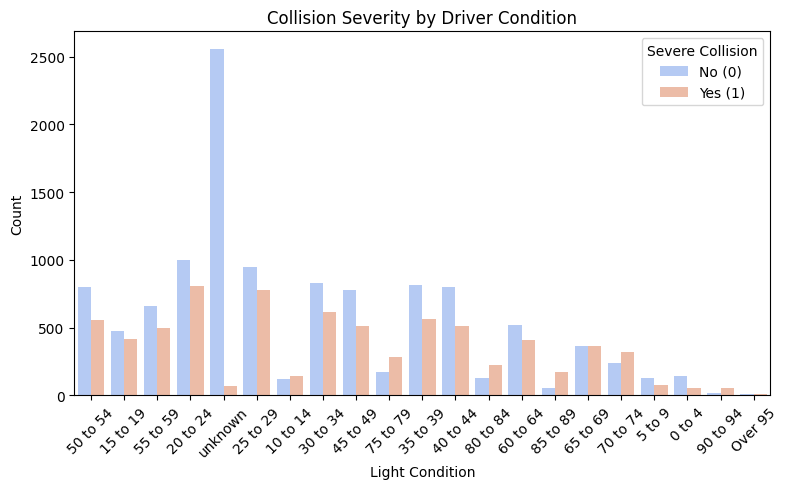

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='INVAGE', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Driver Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [36]:
df[df["NEIGHBOURHOOD_140"] == "NSA"].shape

(154, 59)

In [42]:
misMatch = df[df["HOOD_140"] != df["HOOD_158"]]

In [43]:
misMatch.columns[-10:]

Index(['HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'x', 'y',
       'SEVERE_COLLISION', 'DRIVCOND_GROUPED', 'VEHTYPE_GROUPED',
       'DRIVACT_GROUPED', 'IMPACT_TYPE'],
      dtype='object')

In [46]:
misMatch.iloc[:, -12:]

,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y,SEVERE_COLLISION,DRIVCOND_GROUPED,VEHTYPE_GROUPED,DRIVACT_GROUPED,IMPACT_TYPE
19,144,Morningside Heights,131,Rouge (131),D42,642702.4974,4.855938e+06,1,Unknown,Car,Control / Maneuver Error,Sideswipe/Approaching
20,144,Morningside Heights,131,Rouge (131),D42,642702.4974,4.855938e+06,0,Normal,Car,Other / Unknown,Sideswipe/Approaching
21,144,Morningside Heights,131,Rouge (131),D42,642702.4974,4.855938e+06,1,Normal,Car,No Apparent Error,Sideswipe/Approaching
22,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),D51,632036.3952,4.834468e+06,0,Normal,Car,Right-of-Way / Traffic Violation,T-Bone
23,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),D51,632036.3952,4.834468e+06,1,Normal,Car,No Apparent Error,T-Bone
...,...,...,...,...,...,...,...,...,...,...,...,...
18922,153,Avondale,51,Willowdale East (51),D32,628042.1066,4.846483e+06,1,Normal,Car,Other / Unknown,Pedestrian/Cyclist
18934,166,St Lawrence-East Bayfront-The Islands,73,Moss Park (73),D51,631336.3423,4.834227e+06,0,Normal,Truck,No Apparent Error,Pedestrian/Cyclist
18935,166,St Lawrence-East Bayfront-The Islands,73,Moss Park (73),D51,631336.3423,4.834227e+06,1,Normal,Two Wheeler,Other / Unknown,Pedestrian/Cyclist
18951,142,Woburn North,137,Woburn (137),D43,640724.2608,4.848051e+06,0,Normal,Car,Right-of-Way / Traffic Violation,Pedestrian/Cyclist


In [47]:
misMatch.shape

(4843, 59)

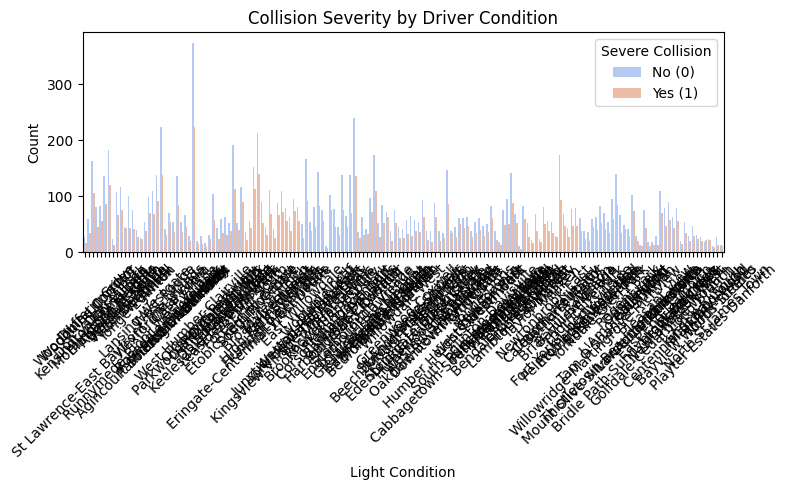

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='NEIGHBOURHOOD_158', hue='SEVERE_COLLISION', data=df, palette='coolwarm')
plt.title('Collision Severity by Driver Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severe Collision', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45) 
plt.tight_layout()     
plt.show()

In [54]:
pd.set_option('display.max_rows', None)
print(df["NEIGHBOURHOOD_140"].value_counts())
pd.reset_option('display.max_rows')

NEIGHBOURHOOD_140
Waterfront Communities-The Island (77)      740
West Humber-Clairville (1)                  592
Bay Street Corridor (76)                    445
Woburn (137)                                409
Wexford/Maryvale (119)                      361
South Riverdale (70)                        355
Islington-City Centre West (14)             326
Downsview-Roding-CFB (26)                   314
Rouge (131)                                 295
South Parkdale (85)                         295
Church-Yonge Corridor (75)                  293
Clairlea-Birchmount (120)                   287
Mimico (includes Humber Bay Shores) (17)    280
York University Heights (27)                271
Kensington-Chinatown (78)                   268
Moss Park (73)                              268
Milliken (130)                              256
Malvern (132)                               250
Dovercourt-Wallace Emerson-Junction (93)    238
Annex (95)                                  236
Bendale (127)         